# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Air quality prediction using ARIMA

**DISCLAIMER:** THIS NOTEBOOK IS PROVIDED ONLY AS A REFERENCE SOLUTION NOTEBOOK FOR THE MINI-PROJECT. THERE MAY BE OTHER POSSIBLE APPROACHES/METHODS TO ACHIEVE THE SAME RESULTS.

## Learning Objectives

At the end of the experiment, you will be able to :

* perform EDA on time series data
* analyze the auto correlation and partial auto correlation plots
* implement the ARIMA model and forecast the air quality

## Information

## Dataset



This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.

**Attributes Information:**

* No: row number
* year: year of data in this row 
* month: month of data in this row 
* day: day of data in this row 
* hour: hour of data in this row 
* PM2.5: PM2.5 concentration (ug/m^3) 
* PM10: PM10 concentration (ug/m^3) 
* SO2: SO2 concentration (ug/m^3) 
* NO2: NO2 concentration (ug/m^3) 
* CO: CO concentration (ug/m^3) 
* O3: O3 concentration (ug/m^3) 
* TEMP: temperature (degree Celsius) 
* PRES: pressure (hPa) 
* DEWP: dew point temperature (degree Celsius) 
* RAIN: precipitation (mm) 
* wd: wind direction 
* WSPM: wind speed (m/s) 
* station: name of the air-quality monitoring site

## Problem Statement

Implement ARIMA model to forecast the air quality using Beijing air quality dataset

## Grading = 10 Points

In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/PRSA_Data_Nongzhanguan_20130301_20170228.csv
print("Dataset downloaded successfully!!")

Dataset downloaded successfully!!


In [ ]:
!pip -qq install pmdarima 

### Import required Packages 

In [ ]:
import warnings
warnings.simplefilter('ignore')
import pmdarima as pm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from scipy.special import expit, logit
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Load the data and analyze (2 Points)

Refer to casestudy: [M6_NB_Case_Study_EDA_Air_Quality_Data](https://drive.google.com/file/d/1HAmSiWKgmRrHLQChY4DGyOI1ky2yPv6c/view?usp=sharing)

In [ ]:
path = "PRSA_Data_Nongzhanguan_20130301_20170228.csv"
df = pd.read_csv(path)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


In [ ]:
df['DATE'] = pd.to_datetime(df[['year', 'month','day','hour']])
df.set_index('DATE',drop=True, inplace=True)
df.fillna(0, inplace=True)

In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DATE,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2013-03-01 01:00:00,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
2013-03-01 03:00:00,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


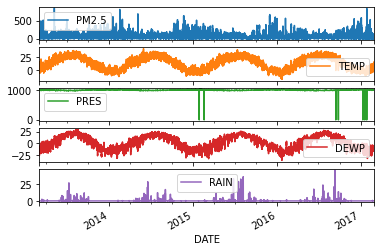

In [ ]:
# plotting multiple weather related variables with PM2.5
multi_data = df[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN']]
multi_data.plot(subplots=True)
plt.show()

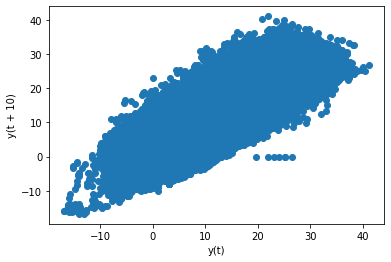

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=10)

#### Pair plot between Features

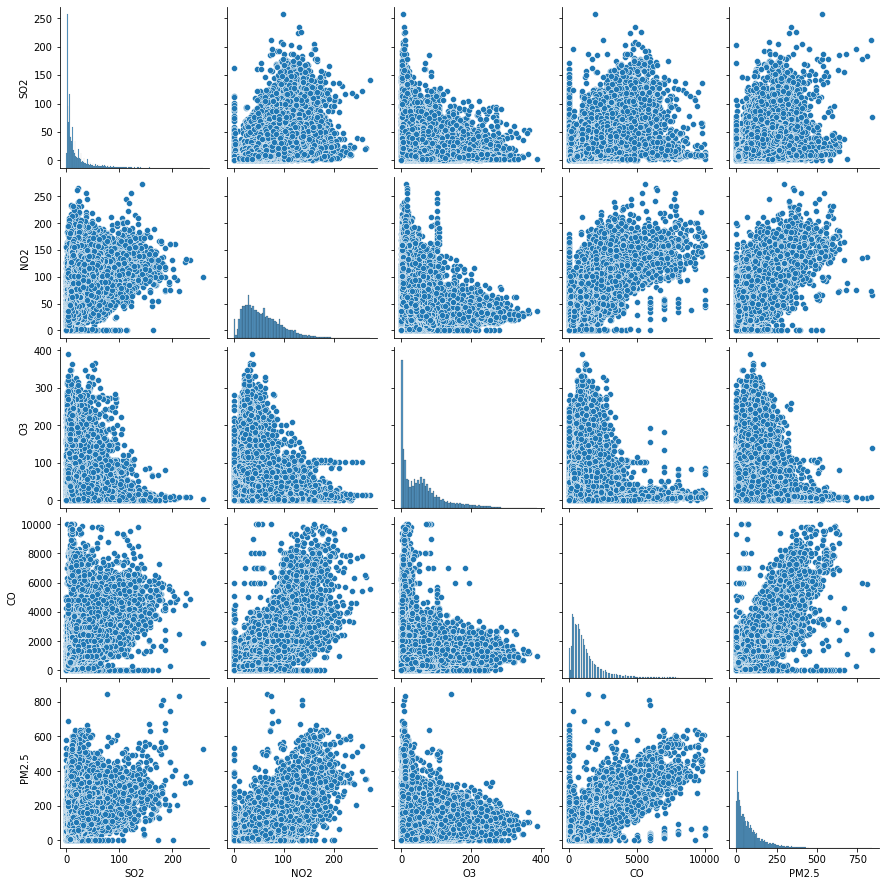

In [ ]:
import seaborn as sns
g = sns.pairplot(df[['SO2','NO2','O3','CO', 'PM2.5']])

By this we can observe the correlation between the features.

We can also find the values of correlation by using pearson correlation matrix.

### Correlation plot between Features (1 Point)

In [ ]:
aq_pear_corr = df[['SO2','NO2','O3','CO','PM10', 'PM2.5']].corr(method='pearson')
aq_pear_corr

,SO2,NO2,O3,CO,PM10,PM2.5
SO2,1.000000,0.498420,-0.181287,0.548073,0.520864,0.530707
NO2,0.498420,1.000000,-0.487559,0.687939,0.671140,0.681005
O3,-0.181287,-0.487559,1.000000,-0.290256,-0.149587,-0.178473
CO,0.548073,0.687939,-0.290256,1.000000,0.719420,0.786448
PM10,0.520864,0.671140,-0.149587,0.719420,1.000000,0.901004
PM2.5,0.530707,0.681005,-0.178473,0.786448,0.901004,1.000000


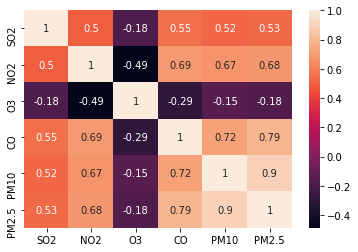

In [ ]:
sns.heatmap(aq_pear_corr,annot=True)

Thus, we can interpret that $PM_{2.5}$ is higly correlated with $CO$ and $PM_{10}$ and moderately correlated with $NO_{2}$.

In [ ]:
aq_df_na = df.copy()
aq_df_na = aq_df_na.dropna()

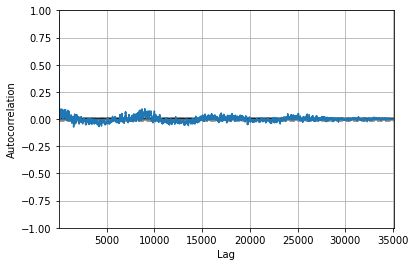

In [ ]:
pd.plotting.autocorrelation_plot(aq_df_na['PM2.5'])

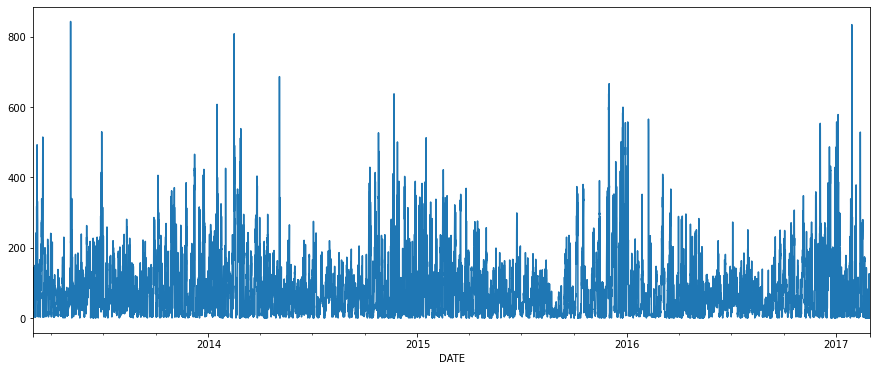

In [ ]:
df['PM2.5'].plot(figsize=(15,6))
plt.show()

### Identify the trends and seasonality from the given time series data (1 Point)

Hint: `seasonal_decompose()`

In [ ]:
df['PM2.5'].fillna(0, inplace=True)
df['PM2.5']

DATE
2013-03-01 00:00:00     5.0
2013-03-01 01:00:00     8.0
2013-03-01 02:00:00     3.0
2013-03-01 03:00:00     5.0
2013-03-01 04:00:00     5.0
                       ... 
2017-02-28 19:00:00    14.0
2017-02-28 20:00:00    18.0
2017-02-28 21:00:00    15.0
2017-02-28 22:00:00    11.0
2017-02-28 23:00:00    10.0
Name: PM2.5, Length: 35064, dtype: float64

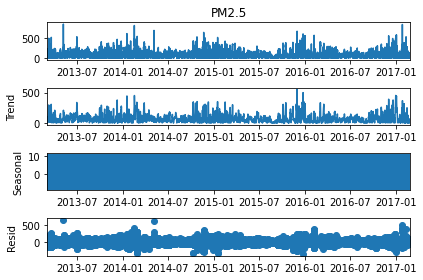

In [ ]:
# The statsmodels library provides a suite of functions for working with time series data
from statsmodels.tsa.seasonal import seasonal_decompose 
df['PM2.5'].fillna(0, inplace=True)
ts = df['PM2.5']

# ETS Decomposition 
result = seasonal_decompose(ts) 

# ETS plot 
result.plot();

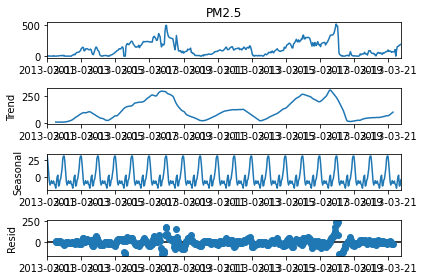

In [ ]:
# ETS Decomposition 
result = seasonal_decompose(ts[:500]) 

# ETS plot 
result.plot();

### Time Series Stationarity (2 Points)

Check the Stationarity of time series using:
  * Dickey Fuller test
  * Rolling mean and Rolling standard deviation

Make the timeseries stationary

* Apply Log transformation and **Differencing** of the timeseries to make it stationary

Verify the stationarity with the Dickey Fuller test

In [ ]:
# Let’s create a function to run the test which determines whether a given time series is stationary
def get_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # Rolling statistics plot
    plt.figure(figsize=(15,5))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

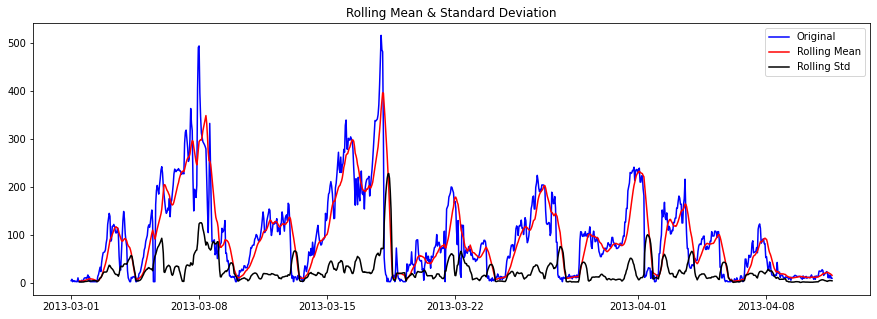

In [ ]:
get_stationarity(df['PM2.5'][:1000])

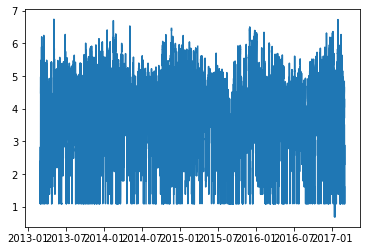

In [ ]:
# ESTIMATING THE TREND
# Applying a log transformation is a way to reduce the variance of the series
df_log = np.log(df['PM2.5'])
plt.plot(df_log);

In [ ]:
print(df_log.min())
df_log.replace(-np.inf, 0,inplace=True)
df_log.min()

-inf


0.0

Eliminating the Trend and Seasonality by **Differencing** (taking the difference with a particular time lag)

In [ ]:
shift_df = pd.concat([df_log, df_log.shift(1)],axis=1)
shift_df.columns = ['Actual','Forecasted']
shift_df.head()

,Actual,Forecasted
DATE,,
2013-03-01 00:00:00,1.609438,NaN
2013-03-01 01:00:00,2.079442,1.609438
2013-03-01 02:00:00,1.098612,2.079442
2013-03-01 03:00:00,1.609438,1.098612
2013-03-01 04:00:00,1.609438,1.609438


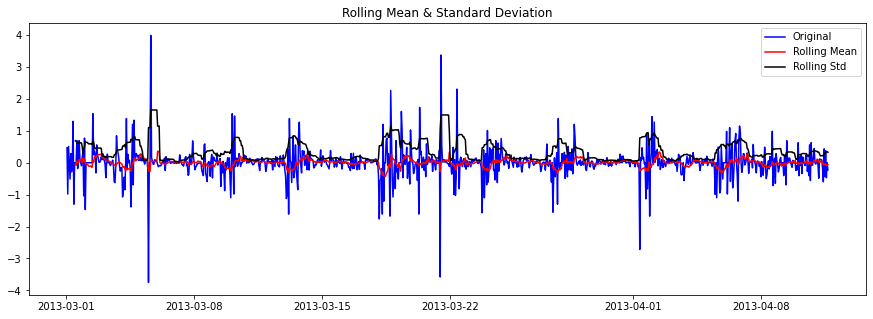

In [ ]:
df_log_shift = shift_df['Actual'] - shift_df['Forecasted']
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift[:1000])

In [ ]:
#Perform Dickey Fuller test    
result = adfuller(df_log)
print('ADF Stastistic: %f'%result[0])
print('p-value: %f'%result[1])
pvalue = result[1]
for key,value in result[4].items():
  if result[0]>value:
    print("The graph is non stationery")
    break
  else:
    print("The graph is stationary")
    break;
print('Critical values:')
for key,value in result[4].items():
    print('\t%s: %.3f ' % (key, value))

ADF Stastistic: -21.883699
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


### Auto Correlation Plot Analysis ( 2 Points)

Autocorrelation refers to the degree of correlation between the values of the same variables across different observations in the data.  The concept of autocorrelation is most often discussed in the context of [time series](https://www.statisticssolutions.com/resources/directory-of-statistical-analyses/time-series-analysis) data in which observations occur at different points in time (e.g.,temperature measured on different days of the month, hours of the day).  For example, one might expect the air temperature on the $1^{st}$ day of the month to be more similar to the temperature on the $2^{nd}$ day compared to the $31^{st}$ day.  If the temperature values that occurred closer together in time are, in fact, more similar than the temperature values that occurred farther apart in time, the data would be autocorrelated.

Autocorrelation can cause problems in conventional analyses (such as ordinary least squares regression) that assume independence of observations.

In a regression analysis, autocorrelation of the regression residuals can also occur if the model is incorrectly specified.  For example, if you are attempting to model a simple linear relationship but the observed relationship is non-linear (i.e., it follows a curved or U-shaped function), then the residuals will be autocorrelated.

* Plot ACF and PACF graphs 
* Analyse and identify the ARIMA (p, d, q) terms

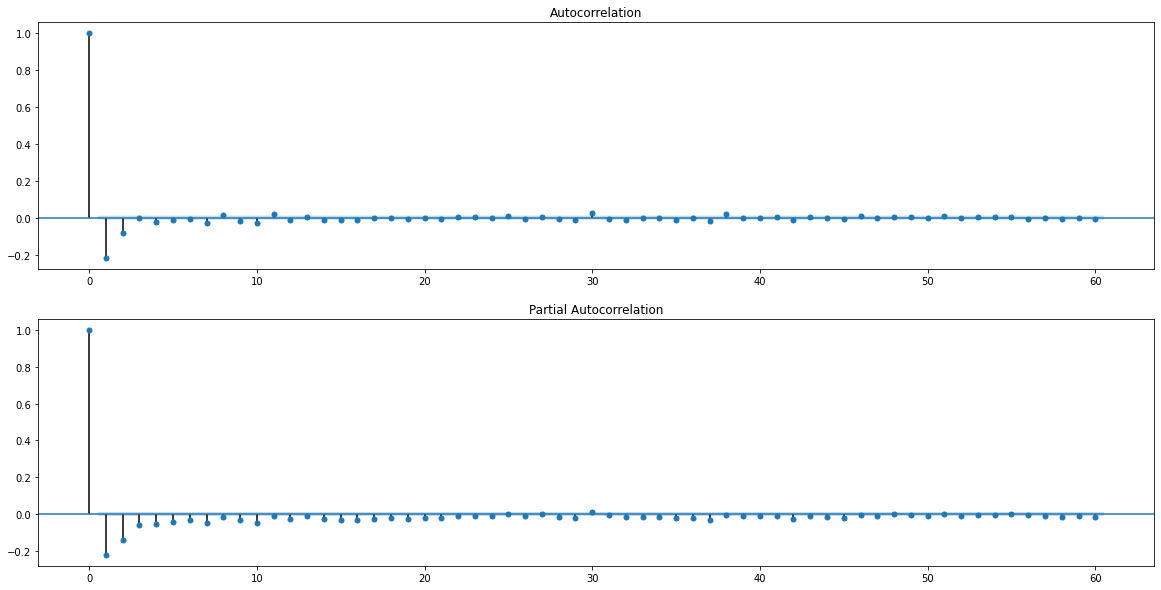

In [ ]:
# let us plot acf and pacf graphs
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize = (20,10))
plt.subplot(211)
plot_acf(df_log_shift, ax=plt.gca(), lags = 60)
plt.subplot(212)
plot_pacf(df_log_shift, ax=plt.gca(), lags = 60)
plt.show()

In [ ]:
# Fit the model
# model = pm.auto_arima(train_ar, seasonal=False)
# model.summary()

In [ ]:
df_log = pd.DataFrame(df_log)
df_log.reset_index(inplace=True)
df_log.DATE = pd.to_datetime(df_log.DATE)
df_log.set_index('DATE',inplace=True)
df_log

,PM2.5
DATE,
2013-03-01 00:00:00,1.609438
2013-03-01 01:00:00,2.079442
2013-03-01 02:00:00,1.098612
2013-03-01 03:00:00,1.609438
2013-03-01 04:00:00,1.609438
...,...
2017-02-28 19:00:00,2.639057
2017-02-28 20:00:00,2.890372
2017-02-28 21:00:00,2.708050


In [ ]:
# split the data into train and test
train_ar = df_log[:int(len(df_log)*0.9)]
test_ar = df_log[int(len(df_log)*0.9):]

In [ ]:
train_ar.tail(),test_ar.head()

(                        PM2.5
 DATE                         
 2016-10-05 16:00:00  4.110874
 2016-10-05 17:00:00  4.043051
 2016-10-05 18:00:00  4.248495
 2016-10-05 19:00:00  4.290459
 2016-10-05 20:00:00  4.465908,                         PM2.5
 DATE                         
 2016-10-05 21:00:00  4.543295
 2016-10-05 22:00:00  4.564348
 2016-10-05 23:00:00  4.682131
 2016-10-06 00:00:00  4.700480
 2016-10-06 01:00:00  4.564348)

In [ ]:
len(train_ar), len(test_ar)

(31557, 3507)

### Implement ARIMA model (2 Points)

* Fit the timeseries data with ARIMA
* Find and interpret the loss (AIC)

In [ ]:
# ARIMA Method - 1
from math import sqrt
from sklearn.metrics import mean_squared_error
# ARIMA model
# order (2,1,2) based on auto_arima performed above
model = ARIMA(train_ar, order=(2,1,2) )
model_fit = model.fit()
print(model_fit.aic)
predictions = model_fit.predict(start=test_ar.index[0],end=test_ar.index[-1])
error = sqrt(mean_squared_error(test_ar, predictions))
print('RMSE value: %.3f' % error)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [ ]:
plt.figure(figsize=(17,7))
plt.plot(test_ar.index, test_ar, color='red', label='Actual Test Data')
plt.plot(test_ar.index, predictions, color='green',marker='o', linestyle='dashed', label='Predicted Data')
plt.legend();

In [ ]:
# ARIMA Method - 2
history = [x for x in train_ar.values]
predictions = list()

for t in range(len(test_ar.values[:50])):
  # order (7,1,2) based on ACF and PACF plots
  model = ARIMA(history, order=(7,1,2) )
  model_fit = model.fit()     
  output = model_fit.forecast() # one-step forecast  
  yhat = output[0]
  predictions.append(yhat)
  obs = test_ar.values[t]
  history.append(obs) 
  print(model_fit.aic)
error = sqrt(mean_squared_error(test_ar[:50], predictions))
print('RMSE value: %.3f' % error)

### Plot the predictions

In [ ]:
plt.figure(figsize=(17,7))
#plt.plot(train_ar, 'green', color='blue', label='Training Data')
plt.plot(test_ar.index[:50], test_ar[:50], color='red', label='Actual Test Data')
plt.plot(test_ar.index[:50], predictions, color='green',marker='o', linestyle='dashed', label='Predicted Data')
plt.legend();

### Implement SARIMAX model (optional)

A SARIMA model can be tuned with two kinds of orders: (p,d,q) order, which refers to the order of the time series. This order is also used in the ARIMA model (which does not consider seasonality); (P,D,Q,S) seasonal order, which refers to the order of the seasonal component of the time series.

In [ ]:
# import necessary files for SARIMA model
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings("ignore")
# lets define hyperparameters for our ARIMA model
p, d, q, P, D, Q, S = 0, (0,1), 2, (1,2), 0, 0, 24
# lets fit the SARIMA model
for each_d in d:
  for each_P in P:
    mod = sm.tsa.statespace.SARIMAX(train_ar, order=(p,each_d,q),
                                    seasonal_order=(each_P,D,Q,S), enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{}x{} - AIC:{}'.format((p,each_d,q), (each_P,D,Q), results.aic))

#### Plot the predictions

In [ ]:
# predicting with SARIMA
sarima_pred = results.predict(start=test_ar.index[0], end=test_ar.index[-1])
# plotting the results
plt.figure(figsize=(10, 7))
plt.plot(train_ar.index, train_ar, label='Train')
plt.plot(test_ar.index, test_ar, label='Test', color='r')
plt.plot(sarima_pred.index, sarima_pred, label='SARIMA', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.show()

### Report Analysis

* Comment on the trend and seasonality of the time series data
* Comment on Dickey Fuller test analysis
* Is the air quality becoming poorer across the years?
* Do we see spikes indicating poor air quality in particular periods each year? What could be the reasons?